In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Peach.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         2629 non-null   object 
 1   precio_venta    2608 non-null   float64
 2   peso            2629 non-null   float64
 3   t_id            2629 non-null   object 
 4   fecha_venta     2624 non-null   object 
 5   hora_venta      2624 non-null   object 
 6   tipo            2629 non-null   object 
 7   fecha_recogida  2629 non-null   object 
 8   hora_recogida   2629 non-null   object 
 9   lote            2629 non-null   object 
 10  marca           2629 non-null   object 
 11  coste_inicial   2554 non-null   float64
 12  proveedor       2629 non-null   object 
dtypes: float64(3), object(10)
memory usage: 267.1+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   2608.000000  2629.000000    2554.000000
mean       3.515378   299.896217       2.006192
std        0.707442    99.148197       0.504231
min        0.879849   -83.445477       0.362661
25%        3.050297   232.987546       1.669116
50%        3.518483   298.715120       1.997914
75%        3.997826   367.950431       2.348725
max        6.094766   657.408638       3.988367


In [ ]:
print(df.head())

         cliente  precio_venta        peso             t_id fecha_venta  \
0  CompraMaestra      3.471426  444.156846  Peach001013.png  2022/09/11   
1  CompraMaestra      3.837127  260.452645  Peach001021.png  2022/09/01   
2  CompraMaestra      4.114872  176.961450  Peach001040.png  2022/10/01   
3  CompraMaestra      3.016513  291.430717  Peach001066.png  2022/09/20   
4  CompraMaestra      3.916714  186.610007  Peach001072.png  2022/09/14   

  hora_venta   tipo fecha_recogida hora_recogida                    lote  \
0      10:00  Peach     2022/09/11         02:00  V69G67N48L49L49O46V78M   
1      14:00  Peach     2022/09/01         13:00  V69G67N48L49L50M46V78M   
2      14:00  Peach     2022/10/01         05:00  V69G67N48L49L52L46V78M   
3      19:00  Peach     2022/09/20         11:00  V69G67N48L49L54R46V78M   
4      23:00  Peach     2022/09/14         15:00  V69G67N48L49L55N46V78M   

               marca  coste_inicial                        proveedor  
0  DeliciaNaturaleza 

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -83.44547717475399
Peso máximo: 657.4086378928534
Total negativos: 4
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
FrescuraInigualable,1
FrescoDelValle,1
FrutaDulce,1
TesoroNaturaleza,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
BioCosecha Orgánica,1
EcoRiego Soluciones,1
Vivero Verde Esperanza,1
Veterinaria EcoAnimal,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['V69G67N48L57R55J80T71', 'V69G67N48L52Q49J80T71',
       'V69G67N48L50Q53O46V78M', 'V69G67N48L49P48R46V78M'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes V69G67N48L.

In [ ]:
print(negativos["peso"])

528    -56.163958
1678   -57.280455
1896    -4.500931
2323   -83.445477
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                     cliente  precio_venta       peso             t_id  \
528           MaxiDescuentos      4.014942 -56.163958   Peach00967.png   
1678              MegaCompra      2.969763 -57.280455   Peach00451.png   
1896  Distribuidora Nacional      4.011343  -4.500931  Peach002553.png   
2323      Distribuidora Alfa      3.964639 -83.445477  Peach001406.png   

     fecha_venta hora_venta   tipo fecha_recogida hora_recogida  \
528   2022/09/30      02:00  Peach     2022/09/29         19:00   
1678  2022/09/14      22:00  Peach     2022/09/14         13:00   
1896  2022/09/22      17:00  Peach     2022/09/22         10:00   
2323  2022/09/29      16:00  Peach     2022/09/29         10:00   

                        lote                marca  coste_inicial  \
528    V69G67N48L57R55J80T71  FrescuraInigualable       2.705211   
1678   V69G67N48L52Q49J80T71       FrescoDelValle       1.925604   
1896  V69G67N48L50Q53O46V78M           FrutaDulce       2.277095   
2323  V69G67N48L49P48

Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 120 g:", len(df[df['peso'] > 120]))
print("Peso máximo:", df.loc[df['peso'] > 120, 'peso'].max())

Cantidad de pesos mayores de 120 g: 2551
Peso máximo: 657.4086378928534


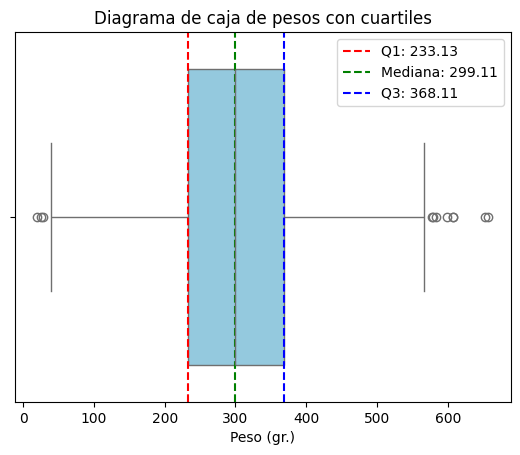

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

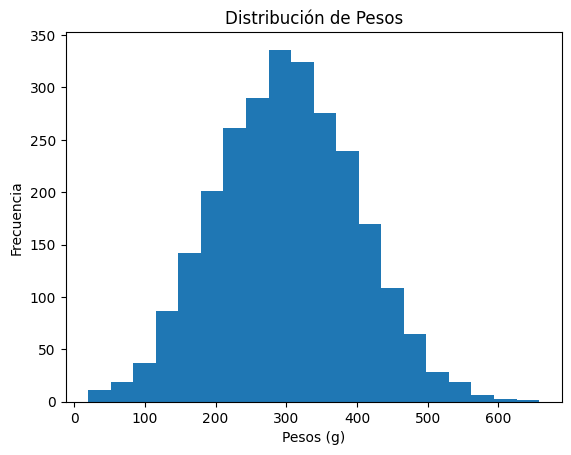

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 8
233.13373429621572
368.1136796127248
134.9799453165091


El peso medio de un melocoton ronda entre los 120 y los 250gr.

In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso             t_id
1689   19.987469   Peach00871.png
336    25.208776  Peach001581.png
1369   27.368664   Peach00478.png
291    38.534803  Peach002248.png
1990   40.694388    Peach0083.png
...          ...              ...
1503  599.064415    Peach0035.png
1554  607.143075  Peach001663.png
139   607.339623  Peach002377.png
745   652.481340   Peach00818.png
1262  657.408638  Peach002338.png

[2625 rows x 2 columns]


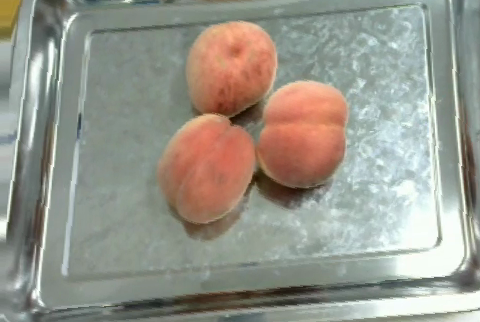

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Peach/Peach00478.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

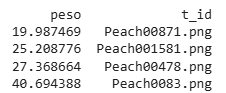

Tanto en la tabla como en la imagen vemos imagenes con varios melocotones y pesos muy bajos para este tipo de fruta.

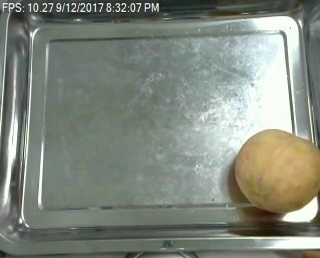

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Peach/Peach00818.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En esta imagen en cambio vemos un solo melocoton con un peso de 652.481340 gr.
Peso muy elevado para ser solamente una unidad.

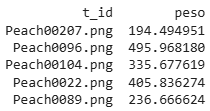

En todas las imagenes anteriores se muestra solamente un melocoton. Algunas podrian tener el peso correcto pero si las comparamos con las que tienen varios los pesos son mucho más elevados.

Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.

# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.3626611146113747
Coste inicial máximo: 3.9883674247246006
Coste inicial negativos: 0
Coste inicial nulos: 75


No encontramos negativos y los costes iniciales van desde los 0.36 hasta los 3.98


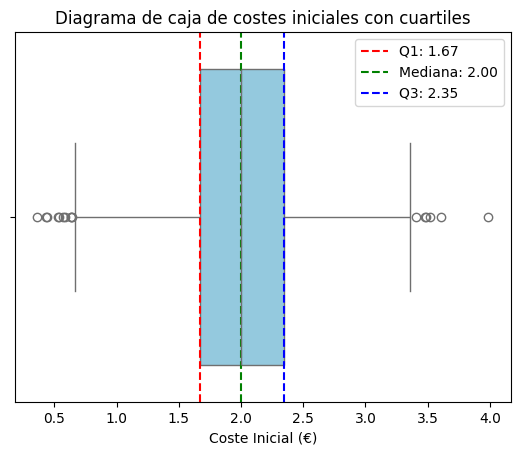

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

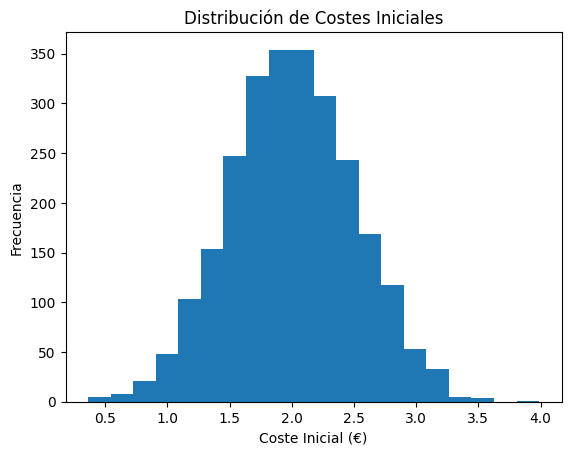

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 6
1.6691161152429934
2.348725024958352
0.6796089097153584


Una vez analizados los costes iniciales y viendo que tenemos 6 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 0.8798488261505883
Precio venta máximo: 6.094765742568416
Total negativos: 0
Total nulos: 21


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ninguno de los 21 nulos es un producto dañado y que, por lo tanto, no ha sido vendido. El resto ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

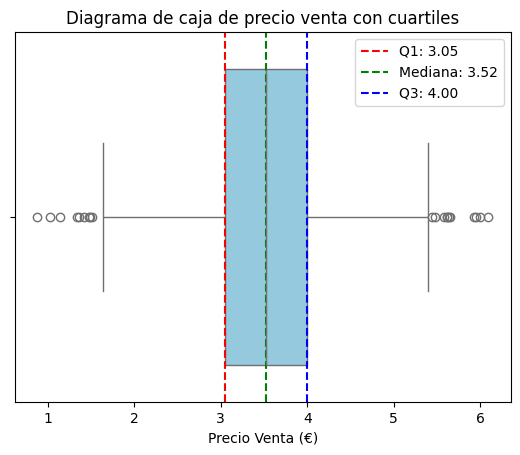

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

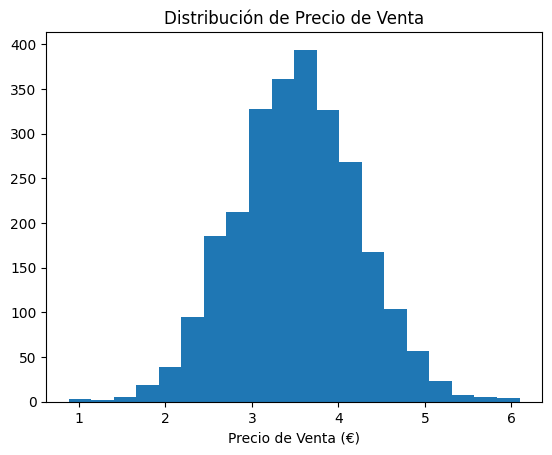

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)

Total outliers: 11
3.050297064581816
3.997825743224288


En precio venta tenemos 11 outliers mientras que en coste inicial teníamos 6.

In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,Almacén Estrella,5.64340,343.000742,Peach001077.png,2022/09/12,15:00,Peach,2022/09/12,15:00,V69G67N48L49L55S46V78M,...,343.000742,2022/09/12,15:00,Peach,2022/09/12,15:00,V69G67N48L49L55S46V78M,AventuraFrutal,3.988367,Fertilizantes Naturales del Valle
1,Distribuciones del Sol,5.58132,297.963594,Peach00692.png,2022/09/29,09:00,Peach,2022/09/29,02:00,V69G67N48L54U50J80T71,...,297.963594,2022/09/29,09:00,Peach,2022/09/29,02:00,V69G67N48L54U50J80T71,DeliciaNaturaleza,3.608420,Energía Renovable AgroSol


2 coinciden.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-28 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
280,-28 days
1336,-26 days
2564,-26 days
2612,-25 days
592,-25 days
...,...
186,NaT
275,NaT
918,NaT
1078,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de melocotones a un proveedor en un solo día.

**En el caso de los melocotones esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con las manzanas no encontramos más de un tipo de fruta ni más de una marca.

**Con los melocotones esta norma se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.707170,-0.614402
precio_venta,0.707170,1.000000,0.040647
rentabilidad,-0.614402,0.040647,1.000000


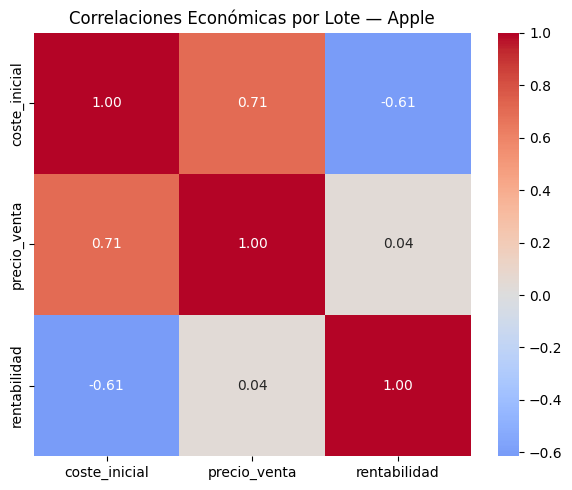

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Apple')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.707170  0.001223
coste_inicial      0.707170       1.000000 -0.017025
peso               0.001223      -0.017025  1.000000


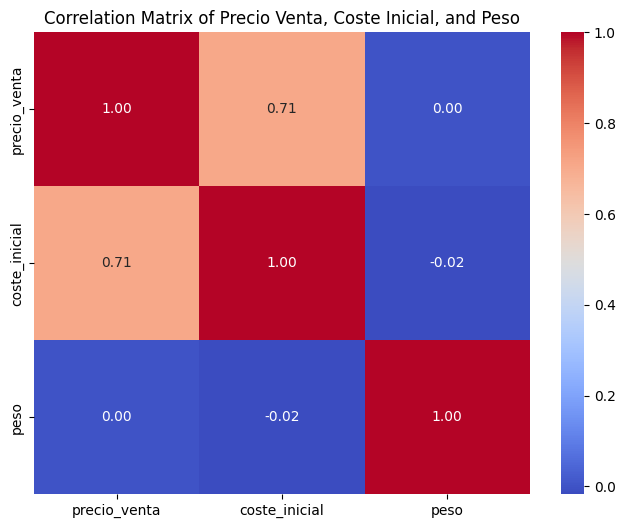

In [ ]:
correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.71 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso. Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor. Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de los melocotones y pasamos a analizar la siguiente fruta.